In [15]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
def objective(x):
    f = np.poly1d([1,-2,-28,28,12,-26,100])

    return f(x)*0.05

Minimum of -219.8012 occurs at 4.8779


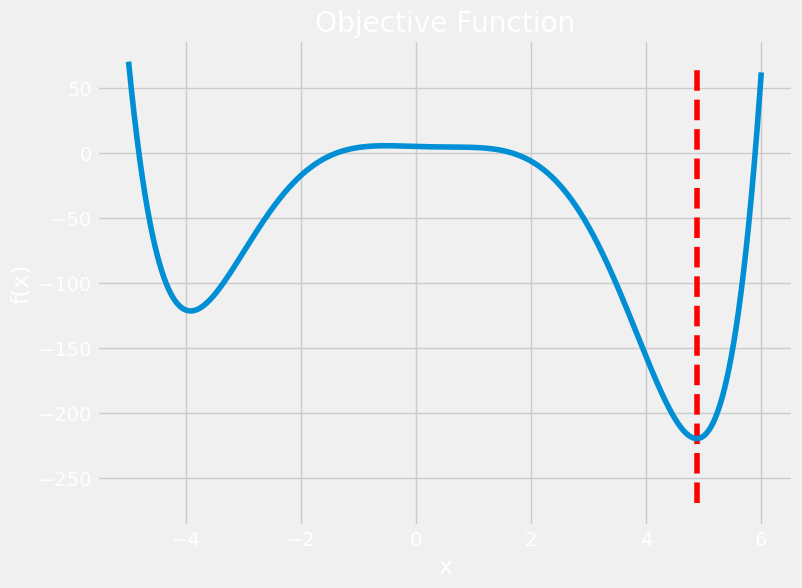

In [13]:
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y)

print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [16]:
from hyperopt import hp

space = hp.uniform('x',-5,6)

Text(0.5, 1.0, 'Domain Space')

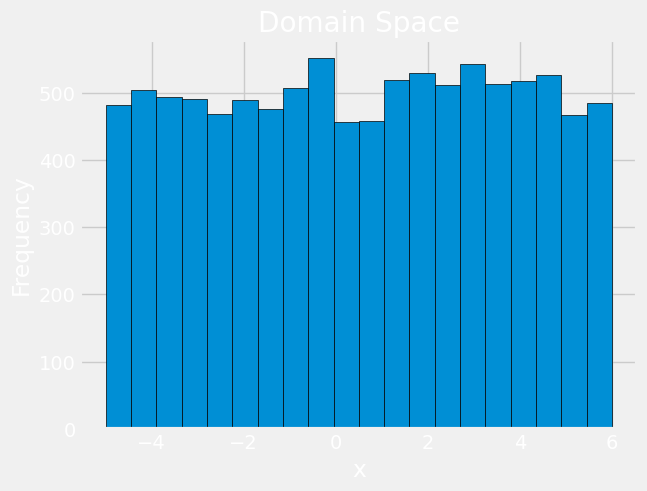

In [17]:
from hyperopt.pyll.stochastic import sample

samples = []

for _ in range(10000):
    samples.append(sample(space))

plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space')

In [20]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [21]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [27]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(46))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(46))
print(rand_best)

  0%|          | 0/2000 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random.mtrand.RandomState' object has no attribute 'integers'